In [2]:
# import the package
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import numpy as np 

In [3]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 366s 2us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
LABELS = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

TypeError: only integer scalar arrays can be converted to a scalar index

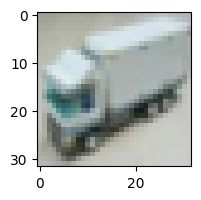

In [6]:
import matplotlib.pyplot as plt 

def plot_sample(X , y , index):
    plt.figure(figsize=(15 , 2))
    plt.imshow(X[index])
    plt.xlabel(LABELS[y[index]])

plot_sample(x_train , y_train , 53)

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [8]:
# Build a model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32 , (3,3) , activation="relu" ,input_shape = (32,32,3)),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Flatten(),
    Dense(64 , activation="relu"),
    Dense(10  ,activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [10]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(x_train, 
          y_train, 
          epochs=10, 
          validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5691 - accuracy: 0.4259 - val_loss: 1.3559 - val_accuracy: 0.5092
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2285 - accuracy: 0.5623 - val_loss: 1.2207 - val_accuracy: 0.5555
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0801 - accuracy: 0.6178 - val_loss: 1.0819 - val_accuracy: 0.6196
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9812 - accuracy: 0.6554 - val_loss: 0.9866 - val_accuracy: 0.6518
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9050 - accuracy: 0.6839 - val_loss: 1.0146 - val_accuracy: 0.6548
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8483 - accuracy: 0.7044 - val_loss: 0.9336 - val_accuracy: 0.6801
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7979 - accuracy: 0.7223 - val_loss: 0.8971 -

In [11]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8965 - accuracy: 0.6952


[0.8964640498161316, 0.6952000260353088]

In [12]:
y_pred = model.predict(x_test)
y_pred[:4]

313/313 [==============================] - 1s 3ms/step


array([[3.95427877e-03, 1.35924271e-03, 1.94253419e-02, 7.86317587e-01,
        4.83288337e-03, 9.23564658e-02, 6.87178550e-03, 8.67348909e-03,
        7.13500530e-02, 4.85873735e-03],
       [2.08539050e-03, 3.22466075e-01, 1.20268226e-06, 7.99625377e-06,
        2.05528090e-06, 1.18070950e-07, 6.94360551e-07, 1.06451154e-07,
        6.74057901e-01, 1.37848326e-03],
       [5.53367240e-03, 5.69454506e-02, 2.19371897e-04, 3.61254835e-03,
        1.15850518e-04, 4.70978179e-04, 1.15538761e-03, 2.48451888e-05,
        9.21699822e-01, 1.02219833e-02],
       [3.44388068e-01, 3.98040980e-01, 2.17940449e-03, 4.32596309e-03,
        1.45425396e-02, 9.25851637e-05, 4.50559513e-04, 7.25805410e-04,
        2.21326917e-01, 1.39271738e-02]], dtype=float32)

In [13]:
model.save("cifar10model.h5")

/usr/local/Caskroom/miniforge/base/envs/streamlit-env/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
